In [1]:
import sys
print(sys.executable)
print(sys.prefix)

G:\GeekDS\venv\python.exe
G:\GeekDS\venv


In [62]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#model training & Evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet

#for cross validation
from sklearn.linear_model import RidgeCV , LassoCV , ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [3]:
df = pd.read_csv('Algerian_cleaned.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.shape

(243, 15)

In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
df.drop(columns=['day','month','year'] , axis=1 , inplace=True)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [9]:
#encoding classes 
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [10]:
df.Classes = np.where(df.Classes.str.contains('not fire'),0,1)

In [11]:
#now checking
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [12]:
#splitting the data 
X = df.drop('FWI' ,axis=1)
y = df.FWI

In [13]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [14]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=22)

In [17]:
X_train.shape , X_test.shape

((182, 11), (61, 11))

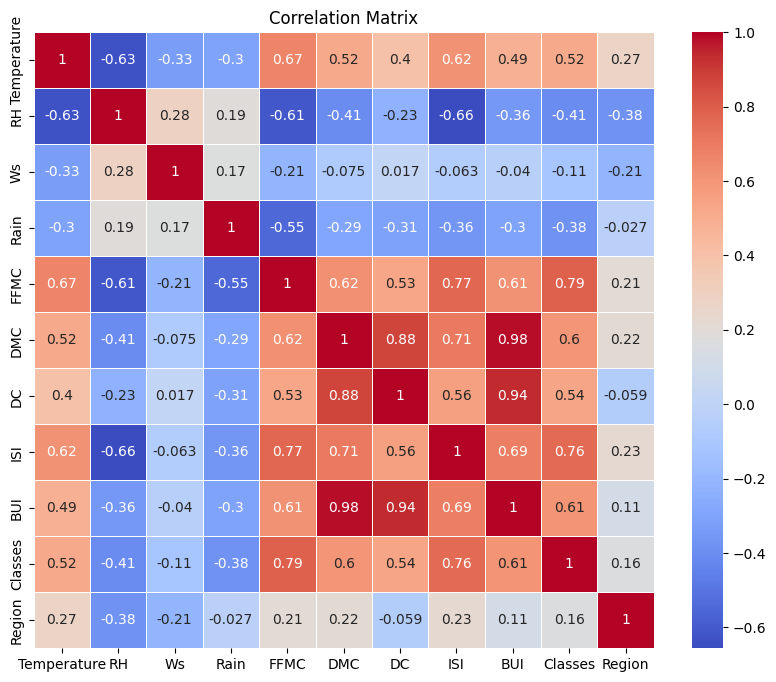

In [25]:
#feature Selection based on correlation

# Set the style
plt.style.use('seaborn-v0_8-colorblind')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [28]:
#based on correlation we check Multicolinearity between the independent feature
def correlation(dataset , threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i , j]) > threshold :
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [32]:
#threshold sets on - Domain Expertise or Knowledge
corr_features = correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [33]:
#dropping the features which have correlation more than 0.85

X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

X_train.shape , X_test.shape

((182, 9), (61, 9))

## feature Scalling

In [34]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [35]:
X_train_scaled

array([[ 1.07875463,  0.55524664, -0.16518193, ...,  0.15863888,
         0.88561489,  0.98907071],
       [-0.26232011, -0.05311055, -0.16518193, ..., -0.18288941,
         0.88561489,  0.98907071],
       [ 0.54232473, -1.40501541, -0.16518193, ..., -0.60323191,
        -1.12915898,  0.98907071],
       ...,
       [-0.53053506,  1.16360382,  1.2331023 , ..., -0.89221738,
        -1.12915898, -1.01105006],
       [-0.26232011, -1.40501541,  1.93224441, ...,  2.3391656 ,
         0.88561489,  0.98907071],
       [-0.26232011, -0.59387249, -1.56346615, ..., -0.52441769,
        -1.12915898, -1.01105006]])

In [36]:
X_test_scaled

array([[ 1.34696958e+00, -1.74299162e+00, -5.14752984e-01,
        -3.95361153e-01,  1.19401042e+00,  1.81584018e+00,
         3.02222216e+00,  8.85614886e-01,  9.89070710e-01],
       [-2.62320115e-01, -5.26277248e-01, -1.56346615e+00,
        -3.95361153e-01,  7.30997236e-01,  1.90775291e-01,
         2.37453095e-01,  8.85614886e-01, -1.01105006e+00],
       [ 8.10539680e-01, -1.26982492e+00,  5.33960185e-01,
        -2.96926502e-01,  5.74285080e-01, -3.62081837e-01,
         2.37453095e-01,  8.85614886e-01,  9.89070710e-01],
       [ 5.42324731e-01, -2.55896277e-01,  1.84389128e-01,
        -3.95361153e-01,  7.52367076e-01,  4.42073985e-01,
         7.62881222e-01,  8.85614886e-01,  9.89070710e-01],
       [ 2.74109783e-01,  1.49675181e-01, -1.65181928e-01,
        -3.46143828e-01,  2.75107328e-01, -1.61042881e-01,
        -4.45603469e-01,  8.85614886e-01, -1.01105006e+00],
       [-7.98750012e-01,  1.77196101e+00, -8.64324040e-01,
        -5.08398747e-02, -2.95173843e+00, -1.048964

## Box Plot to Understand the Effect of Standardization

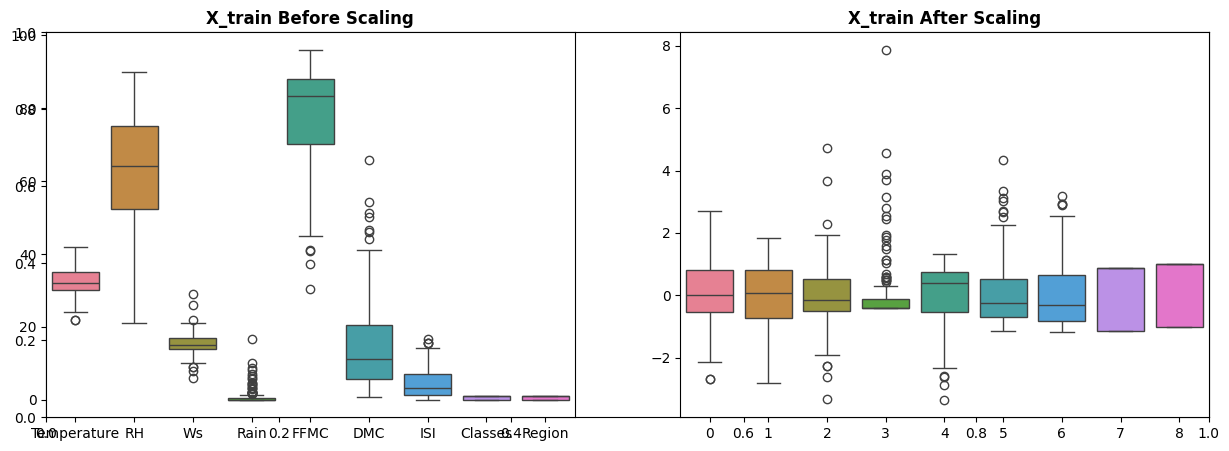

In [37]:
plt.subplots(figsize=(15,5))

#plot figure 1
plt.subplot(121)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling' , weight='bold')

#plot figure 2
plt.subplot(122)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling' , weight='bold')
plt.show()

## Model Building and Evaluation

### Linear Regression Model

Mean Squared Error :  4.6639095741834735
Mean Absolutre Error :  0.9159339253424411
R2 Score :  0.9323075895025762


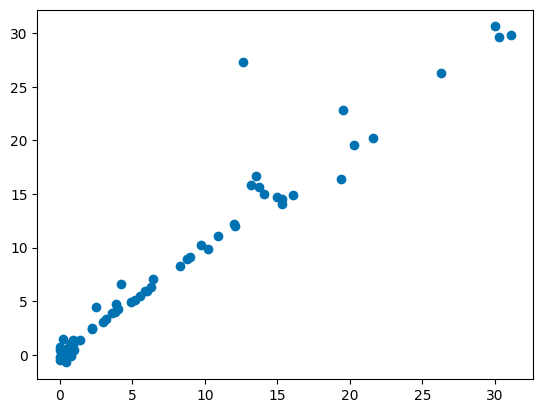

In [40]:
lr = LinearRegression().fit(X_train_scaled,y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Mean Squared Error : " , mean_squared_error(y_test , y_pred_lr))
print("Mean Absolutre Error : " , mean_absolute_error(y_test , y_pred_lr))
print("R2 Score : " , r2_score(y_test , y_pred_lr))

plt.scatter(y_test , y_pred_lr)
plt.show()

## Lasso Regression Model

Mean Squared Error :  5.203221389987195
Mean Absolutre Error :  1.510737610628723
R2 Score :  0.9244799684389993


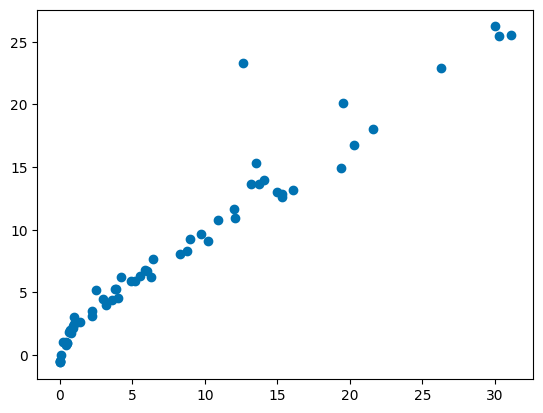

In [41]:
lasso = Lasso().fit(X_train_scaled,y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("Mean Squared Error : " , mean_squared_error(y_test , y_pred_lasso))
print("Mean Absolutre Error : " , mean_absolute_error(y_test , y_pred_lasso))
print("R2 Score : " , r2_score(y_test , y_pred_lasso))

plt.scatter(y_test , y_pred_lasso)
plt.show()

## LassoCV (Cross Validation)

In [42]:
lassocv = LassoCV(cv=5).fit(X_train_scaled,y_train)
lassocv.alpha_

0.023315150206844333

In [44]:
lassocv.alphas_

array([6.64023841, 6.19270856, 5.77534073, 5.3861021 , 5.02309684,
       4.68455693, 4.36883347, 4.07438871, 3.79978855, 3.54369552,
       3.3048623 , 3.08212564, 2.87440069, 2.6806757 , 2.50000713,
       2.33151502, 2.17437871, 2.02783286, 1.89116372, 1.76370561,
       1.64483776, 1.5339812 , 1.430596  , 1.33417862, 1.24425944,
       1.16040052, 1.08219341, 1.00925719, 0.94123664, 0.87780044,
       0.81863963, 0.76346606, 0.712011  , 0.66402384, 0.61927086,
       0.57753407, 0.53861021, 0.50230968, 0.46845569, 0.43688335,
       0.40743887, 0.37997886, 0.35436955, 0.33048623, 0.30821256,
       0.28744007, 0.26806757, 0.25000071, 0.2331515 , 0.21743787,
       0.20278329, 0.18911637, 0.17637056, 0.16448378, 0.15339812,
       0.1430596 , 0.13341786, 0.12442594, 0.11604005, 0.10821934,
       0.10092572, 0.09412366, 0.08778004, 0.08186396, 0.07634661,
       0.0712011 , 0.06640238, 0.06192709, 0.05775341, 0.05386102,
       0.05023097, 0.04684557, 0.04368833, 0.04074389, 0.03799

In [46]:
lassocv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [47]:
lassocv.eps

0.001

## Ridge Regression Model

Mean Squared Error :  4.522992416066226
Mean Absolutre Error :  0.9195139090491503
R2 Score :  0.9343528740351505


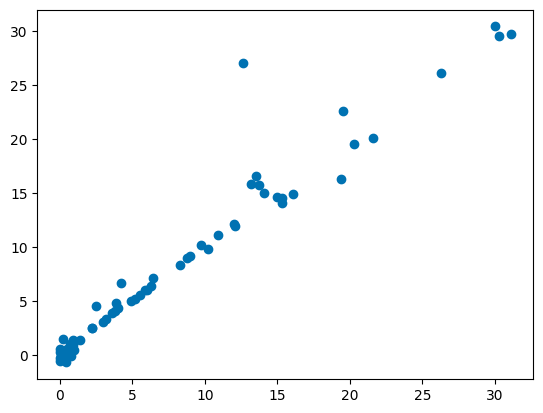

In [48]:
ridge = Ridge().fit(X_train_scaled,y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("Mean Squared Error : " , mean_squared_error(y_test , y_pred_ridge))
print("Mean Absolutre Error : " , mean_absolute_error(y_test , y_pred_ridge))
print("R2 Score : " , r2_score(y_test , y_pred_ridge))

plt.scatter(y_test , y_pred_ridge)
plt.show()

## RidgeCV(Cross Validation)

In [49]:
ridgecv = RidgeCV(cv=5).fit(X_train_scaled,y_train)
ridgecv.alpha_

1.0

In [50]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [51]:
ridgecv.best_score_

0.9861187419596329

In [52]:
ridgecv.alpha_per_target

False

In [57]:
ridgecv.cv

5

In [58]:
ridgecv.n_features_in_

9

In [61]:
ridgecv.scoring

## ElasticNet Regression

Mean Squared Error :  9.09270782886134
Mean Absolutre Error :  2.169428649532212
R2 Score :  0.8680276062187205


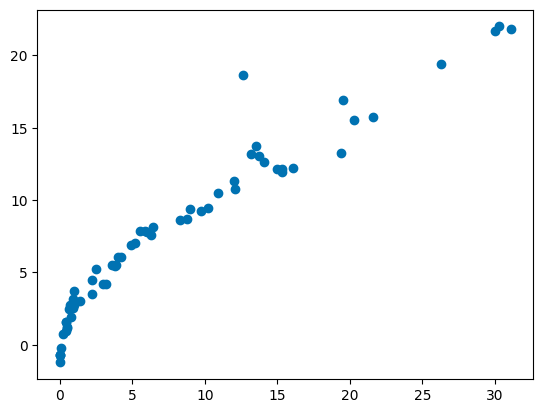

In [63]:
en = ElasticNet().fit(X_train_scaled,y_train)
y_pred_en = en.predict(X_test_scaled)

print("Mean Squared Error : " , mean_squared_error(y_test , y_pred_en))
print("Mean Absolutre Error : " , mean_absolute_error(y_test , y_pred_en))
print("R2 Score : " , r2_score(y_test , y_pred_en))

plt.scatter(y_test , y_pred_en)
plt.show()

## ElasticNetCV(Cross Validation)

In [64]:
encv = ElasticNetCV(cv=5).fit(X_train_scaled,y_train)
encv.alpha_

0.013280476813412214

In [65]:
encv.alphas_

array([13.28047681, 12.38541712, 11.55068146, 10.77220419, 10.04619368,
        9.36911385,  8.73766693,  8.14877743,  7.5995771 ,  7.08739104,
        6.6097246 ,  6.16425129,  5.74880138,  5.36135141,  5.00001427,
        4.66303004,  4.34875742,  4.05566573,  3.78232743,  3.52741122,
        3.28967551,  3.06796239,  2.86119199,  2.66835723,  2.48851888,
        2.32080104,  2.16438682,  2.01851439,  1.88247328,  1.75560088,
        1.63727925,  1.52693211,  1.424022  ,  1.32804768,  1.23854171,
        1.15506815,  1.07722042,  1.00461937,  0.93691139,  0.87376669,
        0.81487774,  0.75995771,  0.7087391 ,  0.66097246,  0.61642513,
        0.57488014,  0.53613514,  0.50000143,  0.466303  ,  0.43487574,
        0.40556657,  0.37823274,  0.35274112,  0.32896755,  0.30679624,
        0.2861192 ,  0.26683572,  0.24885189,  0.2320801 ,  0.21643868,
        0.20185144,  0.18824733,  0.17556009,  0.16372793,  0.15269321,
        0.1424022 ,  0.13280477,  0.12385417,  0.11550681,  0.10

In [67]:
encv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [68]:
sc

StandardScaler()

In [69]:
ridge

Ridge()

In [70]:
import pickle

pickle.dump(sc , open('scaler.pkl' , 'wb'))
pickle.dump(ridge , open('ridge.pkl' , 'wb'))